In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Load the PLUTO Data**

In [ ]:
pluto_data = pd.read_csv('data/land_use.csv')
# pluto_data = pd.read_csv('/content/drive/MyDrive/land_use.csv')
# pluto_shp = gpd.read_file('data/MapPLUTO.shp')

<ipython-input-3-83fec4c1e868>:2: DtypeWarning: Columns (21,22,24,25,26,28,65,66,81,88) have mixed types. Specify dtype option on import or set low_memory=False.
  pluto_data = pd.read_csv('/content/drive/MyDrive/land_use.csv')


In [ ]:
pluto_data.columns

Index(['borough', 'block', 'lot', 'cd', 'bct2020', 'bctcb2020', 'ct2010',
       'cb2010', 'schooldist', 'council', 'zipcode', 'firecomp', 'policeprct',
       'healthcenterdistrict', 'healtharea', 'sanitboro', 'sanitdistrict',
       'sanitsub', 'address', 'zonedist1', 'zonedist2', 'zonedist3',
       'zonedist4', 'overlay1', 'overlay2', 'spdist1', 'spdist2', 'spdist3',
       'ltdheight', 'splitzone', 'bldgclass', 'landuse', 'easements',
       'ownertype', 'ownername', 'lotarea', 'bldgarea', 'comarea', 'resarea',
       'officearea', 'retailarea', 'garagearea', 'strgearea', 'factryarea',
       'otherarea', 'areasource', 'numbldgs', 'numfloors', 'unitsres',
       'unitstotal', 'lotfront', 'lotdepth', 'bldgfront', 'bldgdepth', 'ext',
       'proxcode', 'irrlotcode', 'lottype', 'bsmtcode', 'assessland',
       'assesstot', 'exempttot', 'yearbuilt', 'yearalter1', 'yearalter2',
       'histdist', 'landmark', 'builtfar', 'residfar', 'commfar', 'facilfar',
       'borocode', 'bbl', 'cond

In [ ]:
selected_columns = ['borough', 'block', 'lot', 'bct2020', 'bctcb2020', 'healthcenterdistrict',
                    'zonedist1', 'zonedist2', 'zonedist3', 'zonedist4', 'overlay1', 'overlay2', 'bldgclass', 'landuse', 'lotarea',
                    'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea', 'garagearea', 'strgearea',
                    'factryarea', 'numbldgs', 'numfloors', 'unitsres', 'unitstotal', 'ext', 'proxcode', 'lottype',
                    'assessland', 'assesstot', 'builtfar', 'bbl', 'latitude', 'longitude']

pluto_data = pluto_data[selected_columns]
pluto_data

,borough,block,lot,bct2020,bctcb2020,healthcenterdistrict,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,bldgclass,landuse,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,numbldgs,numfloors,unitsres,unitstotal,ext,proxcode,lottype,assessland,assesstot,builtfar,bbl,latitude,longitude
0,BK,805,70,3002000.0,3.002000e+10,39.0,M1-2D,NaN,NaN,NaN,NaN,NaN,G9,7.0,2003.0,1973.0,1973.0,0.0,0.0,0.0,1973.0,0.0,0.0,1.0,1.0,0.0,1.0,N,0.0,5.0,27000.0,76500.0,0.99,3.008050e+09,40.647054,-74.017622
1,BK,275,17,3000700.0,3.000700e+10,38.0,R6,NaN,NaN,NaN,C1-3,NaN,C7,4.0,4020.0,8979.0,4000.0,4979.0,0.0,4000.0,0.0,0.0,0.0,1.0,3.5,7.0,9.0,E,3.0,5.0,24750.0,909450.0,2.23,3.002750e+09,40.690842,-73.995615
2,BK,275,7502,3000700.0,3.000700e+10,38.0,R6,NaN,NaN,NaN,C1-3,NaN,RM,4.0,4400.0,16420.0,7708.0,8712.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,6.0,8.0,NaN,0.0,5.0,109801.0,2398051.0,3.73,3.002758e+09,40.690653,-73.994945
3,BK,275,7504,3000700.0,3.000700e+10,38.0,R6,NaN,NaN,NaN,C1-3,NaN,RM,4.0,1600.0,3915.0,1023.0,2892.0,0.0,1023.0,0.0,0.0,0.0,1.0,4.0,3.0,4.0,NaN,3.0,0.0,208800.0,844650.0,2.45,3.002758e+09,40.690689,-73.995074
4,BK,275,22,3000700.0,3.000700e+10,38.0,R6,NaN,NaN,NaN,C1-3,NaN,S9,4.0,2400.0,6414.0,2364.0,4050.0,0.0,2364.0,0.0,0.0,0.0,1.0,4.0,5.0,8.0,E,3.0,5.0,18000.0,792000.0,2.67,3.002750e+09,40.690919,-73.995889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858593,MN,1429,44,1013400.0,1.013401e+10,13.0,NaN,NaN,NaN,NaN,NaN,NaN,V1,11.0,2000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,0.0,5.0,603000.0,603000.0,0.00,1.014290e+09,40.771300,-73.958835
858594,BK,409,1703,3006902.0,3.006902e+10,38.0,NaN,NaN,NaN,NaN,NaN,NaN,R1,2.0,NaN,1242.0,0.0,1242.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,NaN,3.0,0.0,0.0,0.0,NaN,3.004092e+09,40.683338,-73.991469
858595,MN,1158,9133,1015501.0,1.015501e+10,15.0,NaN,NaN,NaN,NaN,NaN,NaN,V1,11.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,1.011589e+09,NaN,NaN
858596,BX,3306,26,2041300.0,2.041301e+10,21.0,R8,NaN,NaN,NaN,NaN,NaN,A1,1.0,1203.0,1728.0,0.0,1152.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,N,2.0,5.0,7920.0,34980.0,1.44,2.033060e+09,40.872274,-73.886348


**Features Description**


| #  | Field                      | Description                                                                                                                                                                                                                                               |
|----|----------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  1  | borough                     | The borough where the tax lot is located.<br> This field has a two-character code: BX (Bronx), BK (Brooklyn), MN (Manhattan), QN (Queens), SI (Staten Island).                                                                                               |
|  2  | block                          | The tax block in which the tax lot is located.<br> This field contains a one- to five-digit block number.<br> Each block is unique within a borough.                                                                                                                                         |
|  3  | lot                                 | The tax lot number.<br> It has a one- to four-digit number.<br> Each lot is unique within a tax block.                                                                                                                                                                                         |
|  4  | bct2020                          | The 2020 census tract where the tax lot is located.                                                                                                                                                                                                                                              |
|  5  | bctcb2020                    | The 2020 census block where the tax lot is located.                                                                                                                                                                                                                                             |
|  6  | healthcenterdistrict     | The health center district where the tax lot is located.<br> Thirty districts were created by the city in 1930 to conduct neighborhood-focused health interventions.                                                                                                                           |
|  7  | zonedist1                           | The zoning district classification for the tax lot.<br> Under the Zoning Resolution, New York City has three basic categories: Residence (R), Commercial (C), and Manufacturing (M).<br> These categories are further divided into specific zoning districts.<br> The higher the number after the first letter, the higher the density.    |
|  8  | zonedist2                          | If the tax lot is divided by zoning boundaries, ZONING DISTRICT 2 represents the zoning occupying the second-greatest percentage of the tax lot's area.<br> It includes only districts covering at least 10% of a tax lot's area.                                                                       |
|  9  | zonedist3                           | If the tax lot is divided by zoning boundaries, ZONING DISTRICT 3 represents the zoning occupying the third-greatest percentage.<br> It includes only districts covering at least 10% of the area.                                                                                                   |
| 10 | zonedist4                              | If the tax lot is divided by zoning boundaries, ZONING DISTRICT 4 represents the fourth-greatest percentage of the tax lot's area.<br> If there are fewer than four zoning districts, this field is blank.<br> For example, if a tax lot is divided into four sections (A, B, C, D), ZONING DISTRICT 4 represents the zoning for part D.                          |
| 11 | overlay1                                 | The commercial overlay assigned to the tax lot.<br> A commercial overlay is generally a C1 or C2 zoning district mapped within residential zones to serve local retail needs (e.g., grocery stores, dry cleaners, restaurants).                                                                                                         |
| 12 | overlay2                                 | A second commercial overlay assigned to the tax lot.                                                                                                                                                                                                                                                |
| 13 | bldgclass                                 | A code describing the major use of structures on the tax lot.                                                                                                                                                                                                                                               |
| 14 | landuse                                     | A code for the tax lot's land use category. <br> 01: One & Two Family Buildings, <br> 02 Multi-Family Walk-Up Buildings, <br> 03 Multi-Family Elevator Buildings, <br> 04 Mixed Residential & Commercial Buildings, <br> 05 Commercial & Office Buildings, <br> 06 Industrial & Manufacturing, <br> 07 Transportation & Utility, <br> 08 Public Facilities & Institutions, <br> 09 Open Space & Outdoor Recreation, <br> 10 Parking Facilities, <br> 11 Vacant Land                                                                                                                                                                                                                                                               |
| 15 | lotarea                                      | Total area of the tax lot, expressed in square feet and rounded to the nearest integer.                                                                                                                                                                                                                        |
| 16 | bldgarea                                     | The total gross area in square feet.<br> Condominium measurements from Condo Declaration use net square footage, not gross.                                                                                                                                                                           |
| 17 | comarea                                    | An estimate of the exterior dimensions for the portion of the structure(s) used for commercial purposes.                                                                                                                                                                                                |
| 18 | resarea                                       | An estimate of the exterior dimensions for the portion of the structure(s) used for residential purposes.                                                                                                                                                                                                  |
| 19 | officearea                                    | An estimate of the exterior dimensions for the portion of the structure(s) used for office purposes.<br> If available, the value is taken from PTS; otherwise, it comes from CAMA.<br> This information is not available for one, two, or three-family structures.<br> An OFFICE FLOOR AREA of zero can mean it's either unavailable or inapplicable.   |
| 20 | garagearea                                 | An estimate of the exterior dimensions for the portion of the structure(s) used for garage purposes.                                                                                                                                                                                                             |
| 21 | strgearea                                      | An estimate of the exterior dimensions for the portion of the structure(s) used for storage or loft purposes.                                                                                                                                                                                                |
| 22 | fctryarea                                       | An estimate of the exterior dimensions for the portion of the structure(s) used for factory, warehouse, or loft use.                                                                                                                                                                                          |
| 23 | numbldgs                                    | The number of buildings on the tax lot.                                                                                                                                                                                                                                                                       |
| 24 | numfloors                                    | The number of full and partial floors for the tallest building on the tax lot.<br> A partial floor is one that doesn't span the entire building envelope.<br> If a building has three stories, with one partial floor, the total count would be 2.5.                                                 |
| 25 | unitres                                           | The sum of residential units in all buildings on the tax lot.                                                                                                                                                                                                                                                      |
| 26 | unitstotal                                      | The sum of residential and non-residential units (e.g., offices, retail stores, etc.) for all buildings on the tax lot.                                                                                                                                                                                           |
| 27 | ext                                                     | A code identifying whether there's an extension on the lot or a garage other than the primary structure.                                                                                                                                                                                                                                              |
| 28 | proxcode                                           | A code describing the physical relationship of the building to neighboring buildings.<br> If there are multiple buildings on the lot, CAMA data for building number one is used.                                                                                                                                                     |
| 29 | lottype                                              | A code indicating the location of the tax lot in relation to another tax lot and/or water.                                                                                                                                                                                                                                 |
| 30 | assessland                                         | The assessed land value for the tax lot.<br> It is calculated by multiplying the estimated full market land value by a uniform percentage for the property's tax class.                                                                                                                                                   |
| 31 | asesstot                                              | The assessed total value for the tax lot.<br> It is calculated by multiplying the estimated full market value by a uniform percentage for the property's tax class.                                                                                                                                                      |
| 32 | builtfar                                                | BUILT FLOOR AREA RATIO is the total building floor area divided by the area of the tax lot.<br> This is an estimate based on rough building area and lot area measurements.                                                                                                                                            |
| 33 | bbl                                                         | A concatenation of the borough code, tax block, and tax lot.<br> The field consists of the borough code followed by the tax block and the tax lot, with leading zeros if needed.                                                                                                                                                |
| 34 | latitude                                                 | The WGS 84 latitude of the latitude/longitude coordinate pair for the approximate location of the tax lot.                                                                                                                                                                                                          |
| 35 | longitude                                               | The WGS 84 longitude of the latitude/longitude coordinate pair for the approximate location of the tax lot.                                                                                                                                                                                                        |


### **Explore Data Structure**
Display the first few rows of the datasets to understand the structure and format of the data.

Check the data types of each column (numeric, categorical, date, etc.).

Inspect the dimensions of the datasets (number of rows and columns).

Specify data_types where necessary ↓

In [ ]:
# Number of rows: 858,598
print(pluto_data.shape)

(858598, 36)


In [ ]:
# Check data info
pluto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858598 entries, 0 to 858597
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   borough               858598 non-null  object 
 1   block                 858598 non-null  int64  
 2   lot                   858598 non-null  int64  
 3   bct2020               857601 non-null  float64
 4   bctcb2020             857601 non-null  float64
 5   healthcenterdistrict  856924 non-null  float64
 6   zonedist1             856977 non-null  object 
 7   zonedist2             19750 non-null   object 
 8   zonedist3             214 non-null     object 
 9   zonedist4             13 non-null      object 
 10  overlay1              74442 non-null   object 
 11  overlay2              176 non-null     object 
 12  bldgclass             858241 non-null  object 
 13  landuse               855837 non-null  float64
 14  lotarea               857622 non-null  float64
 15  

Some of the variables are technically categorical (like code-based variables) but are stored in numerical form. These variables are:  'block', 'lot', 'bct2020', 'bctcb2020', 'healthcenterdistrict', 'bldgclass', 'landuse', 'proxcode', 'lottype', 'bbl'.

In [ ]:
# Change data type
columns_convert_to_str = ['block', 'lot', 'bct2020', 'bctcb2020', 'healthcenterdistrict', 'bldgclass', 'landuse', 'proxcode', 'lottype', 'bbl']
pluto_data[columns_convert_to_str] = pluto_data[columns_convert_to_str].astype(str)

In [ ]:
# Check data info again
pluto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858598 entries, 0 to 858597
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   borough               858598 non-null  object 
 1   block                 858598 non-null  object 
 2   lot                   858598 non-null  object 
 3   bct2020               858598 non-null  object 
 4   bctcb2020             858598 non-null  object 
 5   healthcenterdistrict  858598 non-null  object 
 6   zonedist1             856977 non-null  object 
 7   zonedist2             19750 non-null   object 
 8   zonedist3             214 non-null     object 
 9   zonedist4             13 non-null      object 
 10  overlay1              74442 non-null   object 
 11  overlay2              176 non-null     object 
 12  bldgclass             858598 non-null  object 
 13  landuse               858598 non-null  object 
 14  lotarea               857622 non-null  float64
 15  

### **Data Inspection**

In [ ]:
# Check number of unique data of each features
pluto_data.nunique()

borough                      5
block                    13959
lot                       2567
bct2020                   2322
bctcb2020                33190
healthcenterdistrict        30
zonedist1                  170
zonedist2                  154
zonedist3                   71
zonedist4                   11
overlay1                    10
overlay2                    10
bldgclass                  214
landuse                     11
lotarea                  30082
bldgarea                 38891
comarea                  21015
resarea                  29339
officearea                9080
retailarea                9817
garagearea                4181
strgearea                 3407
factryarea                3030
numbldgs                   137
numfloors                  177
unitsres                   749
unitstotal                 791
ext                          4
proxcode                     4
lottype                     10
assessland               15811
assesstot                34629
builtfar

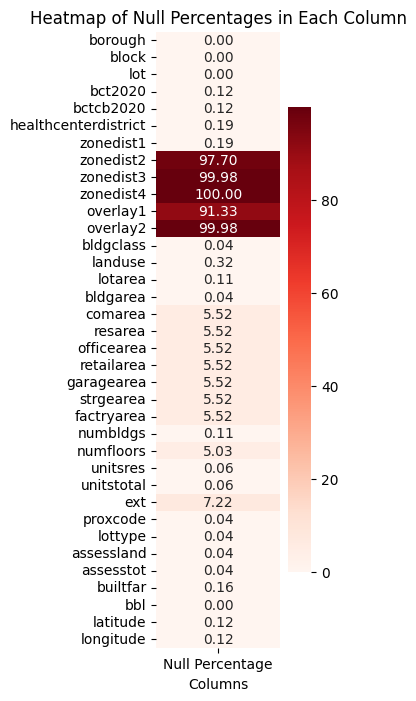

In [ ]:
# Check null values
# Calculate the percentage of null values in each column
null_percentage = (pluto_data.isnull().sum() / pluto_data.shape[0] * 100).to_frame(name='Null Percentage')

# Create a heatmap to visualize null percentages
plt.figure(figsize=(2, 8))
sns.heatmap(null_percentage, annot=True, cmap='Reds', cbar=True, fmt=".2f")
plt.title("Heatmap of Null Percentages in Each Column")
plt.xlabel("Columns")
plt.show()

- Five columns (`zonedist2`, `zonedist3`, `zonedist4`, `overlay1`, `overlay2`) have almost a 100% rate of missing values. Because this is excessively high, we can safely drop these columns from further analysis.
- According to the documentation, blank (null) values are due to unknown information. However, removing these rows might harm the dataset since we need a complete dataset to join with the energy dataset. Hence, we will either impute this dataset or keep these null values.
- Key numerical variables like `area` ('comarea', 'resarea', 'officearea', 'retailarea', 'garagearea', 'strgearea', 'factryarea') seems like have same exact null value of 5.52%, which may come from one row. They will be handled after checking where do they come from.
- Meanwhile, the remaining numerical datasets will keep their null values, as some of them are technically categorical (like code-based variables) but are stored in numerical form, such as `landuse` which contain information about the code for the tax lot's land use category.


In [ ]:
pluto_data.columns

Index(['borough', 'block', 'lot', 'bct2020', 'bctcb2020',
       'healthcenterdistrict', 'zonedist1', 'zonedist2', 'zonedist3',
       'zonedist4', 'overlay1', 'overlay2', 'bldgclass', 'landuse', 'lotarea',
       'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea',
       'garagearea', 'strgearea', 'factryarea', 'numbldgs', 'numfloors',
       'unitsres', 'unitstotal', 'ext', 'proxcode', 'lottype', 'assessland',
       'assesstot', 'builtfar', 'bbl', 'latitude', 'longitude'],
      dtype='object')

**Below, we'll conduct an exploration to identify the origins of null values in features related to `area`, the `numfloors` feature, and the `ext` feature.**

In [ ]:
# Select features
selected_features = ['landuse', 'bldgclass', 'lotarea', 'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea',
                     'garagearea', 'strgearea', 'factryarea', 'numbldgs', 'numfloors']

# Create boolean masks for the specified columns indicating null values
mask_com = pluto_data['comarea'].isnull()  # Mask for column 'comarea'
mask_res = pluto_data['resarea'].isnull()
mask_office = pluto_data['officearea'].isnull()
mask_retail = pluto_data['retailarea'].isnull()
mask_garage = pluto_data['garagearea'].isnull()
mask_strg = pluto_data['strgearea'].isnull()
mask_fctry = pluto_data['factryarea'].isnull()

# Combine the masks all have null values
aligned_null_rows = mask_com & mask_res & mask_office & mask_retail & mask_garage & mask_strg & mask_fctry

# Slice the original DataFrame to get only rows with aligned nulls across 'a', 'b', 'c'
area_null = pluto_data[aligned_null_rows][selected_features]

# Display the sliced DataFrame
area_null.sample(15, random_state=1)

,landuse,bldgclass,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,numbldgs,numfloors
669880,11.0,V0,150.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
757561,9.0,Q1,61575.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
390107,1.0,B2,5400.0,1535.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
551113,11.0,V0,2500.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
665163,11.0,V1,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
486611,11.0,V0,5000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
858068,11.0,V1,2250.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
842428,11.0,V0,3320.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
622302,2.0,C0,2000.0,2720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.5
668836,11.0,V2,2000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [ ]:
# Sanity check where the NaN in 'comarea', 'resarea', 'officearea', 'retailarea', 'garagearea', 'strgearea', 'factryarea' come from
# Check predominant building area value
print(area_null['bldgarea'].value_counts())
print()

# Check predominant building class value
print(area_null['bldgclass'].value_counts())
print()

# Check predominant landuse value
print(area_null['landuse'].value_counts())
print()

bldgarea
0.0        42033
2400.0        39
2000.0        33
1280.0        31
1152.0        28
           ...  
2904.0         1
3793.0         1
17200.0        1
2014.0         1
2426.0         1
Name: count, Length: 2679, dtype: int64

bldgclass
V0    18379
V1     6191
G7     5040
G0     2442
Z9     1555
      ...  
F2        1
RC        1
I7        1
O9        1
RK        1
Name: count, Length: 167, dtype: int64

landuse
11.0    25476
10.0     7896
9.0      3819
1.0      3221
7.0      2718
5.0       787
2.0       670
4.0       229
3.0       155
8.0       144
6.0        58
Name: count, dtype: int64



**Takeaways**
- `bldgarea`: It seems  that the null values in the chosen features mostly originate from buildings with an area of 0. A TOTAL BUILDING FLOOR AREA of zero can mean it is either not available or not applicable. TOTAL BUILDING FLOOR AREA is set to zero if the building class starts with “V” and the number of buildings is zero. If NUMBER OF BUILDINGS is zero, then a TOTAL BUILDING FLOOR AREA of zero means it is not applicable.
- `bldgclass`: It appears that the majority of null values in come  from the top five building classes: V0, V1, G7, G0, and Z9. Building class starting with “V” that are identified in the NYC GIS Zoning Database as PARK, BALL FIELD, PLAYGROUND, or PUBLIC SPACE. G0 and G7 is parking facilities. Z9 is not assigned to a Land Use Category.
- `landuse`: It seems that the null values in the selected features primarily come from land use categories 11, 10, and 9. Land use 9 denotes Open Space & Outdoor Recreation, land use 10 represents Parking Facilities, and land use 11 signifies Vacant Land.
- Conclusion: this exploration suggests that the null values in columns such as `comarea`, `officearea`, etc. may be attributed to the absence of applicable values due to no buildings on the lot. Therefore, it seems appropriate to replace these null values with 0.

In [ ]:
# Sanity check where the NaN in 'numfloors' come from
# Define df
null_numfloors = pluto_data[pluto_data['numfloors'].isnull() == True]
# null_numfloors[selected_features]

# Check predominant building area value
print(null_numfloors['bldgarea'].value_counts())
print()

# Check predominant building class value
print(null_numfloors['bldgclass'].value_counts())
print()

# Check predominant landuse value
print(null_numfloors['landuse'].value_counts())
print()

bldgarea
0.0         40503
1640.0         46
2400.0         45
2460.0         23
400.0          15
            ...  
102932.0        1
8498.0          1
8988.0          1
5420.0          1
1002.0          1
Name: count, Length: 1795, dtype: int64

bldgclass
V0    18409
V1     6225
G7     4979
Z9     1588
Q0     1224
      ...  
H1        1
A6        1
W8        1
O5        1
I1        1
Name: count, Length: 146, dtype: int64

landuse
11.0    25541
10.0     6441
9.0      3895
7.0      2746
1.0       924
2.0       508
3.0       480
4.0       226
5.0       189
8.0        84
6.0        33
Name: count, dtype: int64



In [ ]:
# Sanity check where the NaN in 'ext' come from
# Define df
null_ext = pluto_data[pluto_data['ext'].isnull() == True]
# null_numfloors[selected_features]
print(len(null_ext))

# Check predominant building area value
print(null_ext['bldgarea'].value_counts())
print()

# Check predominant building class value
print(null_ext['bldgclass'].value_counts())
print()

# Check predominant landuse value
print(null_ext['landuse'].value_counts())
print()

61957
bldgarea
0.0        34000
2400.0       181
3000.0       122
1552.0        87
1800.0        83
           ...  
30998.0        1
10218.0        1
20907.0        1
71650.0        1
552.0          1
Name: count, Length: 14372, dtype: int64

bldgclass
V0    18385
V1     6151
G7     4837
RM     3939
B2     2296
      ...  
K3        1
G4        1
F2        1
N1        1
U6        1
Name: count, Length: 186, dtype: int64

landuse
11.0    25438
1.0      7991
2.0      7757
4.0      7055
10.0     5232
9.0      2406
3.0      2279
5.0      1652
8.0       519
6.0       363
7.0       202
Name: count, dtype: int64



Same with `area` related features, null values in `numfloors` and `ext` may be attributed to the absence of applicable values due to no buildings on the lot. Therefore, it seems appropriate to replace these null values with 0.

### **Summary Statistics**
Compute summary statistics for numeric variables (mean, median, min, max, standard deviation, etc.).

Count unique values for categorical variables.

In [ ]:
# Select all numerical variables
num_var = pluto_data.select_dtypes(include=['int64','float64']).columns.to_list()

# Show descriptive stats
pluto_data[num_var].describe().T[['count', 'mean', 'std', 'min', 'max']]

,count,mean,std,min,max
block,858598.0,5.309717e+03,3.699111e+03,0.000000e+00,9.999900e+04
lot,858598.0,1.503049e+02,8.199603e+02,1.000000e+00,9.502000e+03
bct2020,857601.0,3.512755e+06,1.027070e+06,1.000100e+06,5.990100e+06
bctcb2020,857601.0,3.512755e+10,1.027070e+10,1.000100e+10,5.990100e+10
healthcenterdistrict,856924.0,3.831333e+01,9.622831e+00,1.100000e+01,5.100000e+01
landuse,855837.0,2.122213e+00,2.327476e+00,1.000000e+00,1.100000e+01
lotarea,857622.0,8.130099e+03,3.738030e+05,0.000000e+00,2.143784e+08
bldgarea,858215.0,6.611010e+03,6.112087e+04,0.000000e+00,2.400000e+07
comarea,811216.0,2.253771e+03,5.116438e+04,0.000000e+00,2.400000e+07
resarea,811216.0,4.384643e+03,3.157960e+04,0.000000e+00,1.321140e+07


When exploring summary statistics, we only need to focus on the relevant numerical variables. Certain integer/float variables such as 'block', 'lot', 'bct2020', 'bctcb2020', 'healthcenterdistrict', 'landuse', 'proxcode', 'lottype', 'bbl', 'latitude', 'longitude' should be excluded from analysis.

In [ ]:
# Select relevant numerical variables
stats_var = ['lotarea','bldgarea','comarea','resarea','officearea','retailarea','garagearea','strgearea','factryarea',
             'numbldgs','numfloors','unitsres','unitstotal']

# Show descriptive stats
pluto_data[stats_var].describe().T[['count', 'mean', 'std', 'min', 'max']]

,count,mean,std,min,max
lotarea,857622.0,8130.098905,373802.955839,0.0,2.143784e+08
bldgarea,858215.0,6611.009747,61120.866418,0.0,2.400000e+07
comarea,811216.0,2253.771246,51164.379400,0.0,2.400000e+07
resarea,811216.0,4384.642714,31579.599096,0.0,1.321140e+07
officearea,811216.0,825.865215,22397.562451,0.0,3.583167e+06
retailarea,811216.0,354.621823,6348.696715,0.0,2.192088e+06
garagearea,811216.0,155.575230,5847.908594,0.0,2.677430e+06
strgearea,811216.0,103.159115,4199.055964,0.0,1.757298e+06
factryarea,811216.0,136.040761,4518.705844,0.0,1.324592e+06
numbldgs,857622.0,1.269328,2.699237,0.0,1.860000e+03


In [ ]:
# Show descriptive stats for categorical data
pluto_data.describe(include=['O']).transpose()

,count,unique,top,freq
borough,858598,5,QN,324534
zonedist1,856977,170,R5,90067
zonedist2,19750,154,R6B,1716
zonedist3,214,71,R5,16
zonedist4,13,11,PARK,2
overlay1,74442,10,C2-4,16502
overlay2,176,10,C2-4,32
bldgclass,858241,214,A1,123053
ext,796641,4,N,448480


### **Data Distribution**
Plot histograms or density plots to visualize the distribution of numeric variables.

For categorical variables, create bar plots to visualize the frequency distribution of each category.



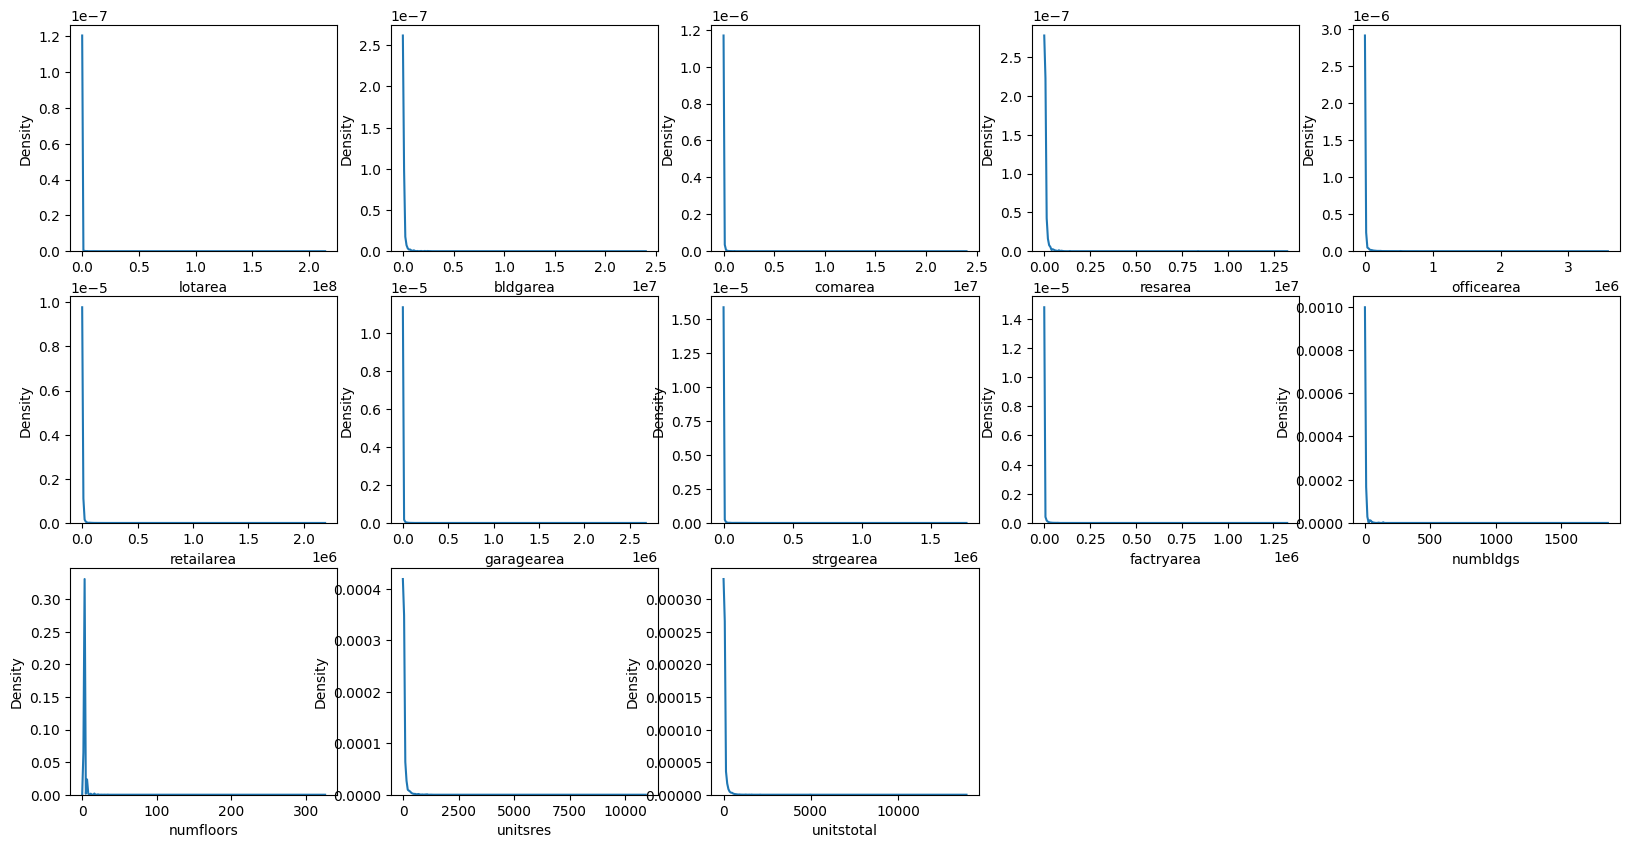

In [ ]:
# plot to see each numerical variables distribution
plt.figure(figsize = (20, 10))

for i in range(len(stats_var)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(data=pluto_data, x = pluto_data[stats_var[i]])

All of the column are highly skewed.

### **Outlier Detection**
Identify outliers in the data using visualization techniques such as box plots or scatter plots.

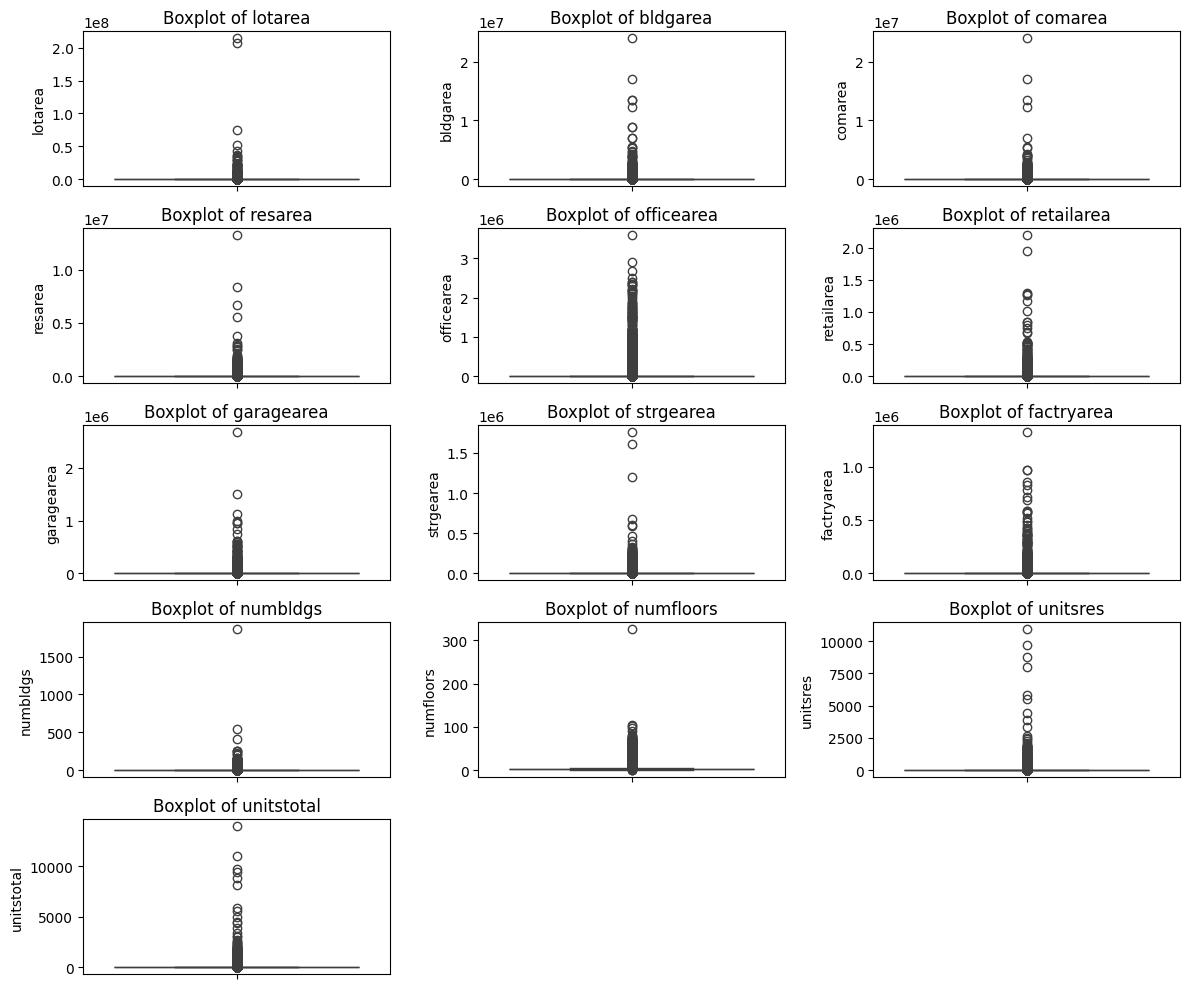

In [ ]:
# Define the number of rows and columns for the subplots
num_features = 13
num_rows = 5
num_cols = 3

# Create a subplot grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
axs = axs.flatten()

# Create a boxplot for each specified feature in a separate subplot
for i, feature in enumerate(stats_var):
    sns.boxplot(y=pluto_data[feature], ax=axs[i])  # Create the boxplot for each feature
    axs[i].set_title(f'Boxplot of {feature}')  # Set the title for each subplot

# Hide any unused subplots (if the grid has more spaces than required)
for j in range(len(stats_var), len(axs)):
    axs[j].axis('off')

# Display the plot with subplots for each feature
plt.tight_layout()  # Adjust spacing to avoid overlap
plt.show()



### **Handle Missing Values**
Identify and count missing values in the datasets. In this dataset, we should not expect any of the rows to have data for every column.

Therefore, we need to decide on an appropriate strategy to handle missing values (imputation, removal, etc.).

For this case, there are 3 ways to handle the null values.
- Drop columns: `zonedist2`, `zonedist3`, `zonedist4`, `overlay1`, `overlay2`
- Imputation with 0: 'lotarea','bldgarea','comarea','resarea','officearea','retailarea','garagearea','strgearea','factryarea','numbldgs','numfloors','unitsres','unitstotal'
- Keep: remaining of the variables

In [ ]:
# Drop
# create list of unecessary features
list_columns_to_drop = ['zonedist2', 'zonedist3', 'zonedist4', 'overlay1', 'overlay2']

# drop features
pluto_data_clean = pluto_data.drop(columns=list_columns_to_drop)
pluto_data_clean

,borough,block,lot,bct2020,bctcb2020,healthcenterdistrict,zonedist1,bldgclass,landuse,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,numbldgs,numfloors,unitsres,unitstotal,ext,proxcode,lottype,assessland,assesstot,builtfar,bbl,latitude,longitude
0,BK,805,70,3002000.0,30020002001.0,39.0,M1-2D,G9,7.0,2003.0,1973.0,1973.0,0.0,0.0,0.0,1973.0,0.0,0.0,1.0,1.0,0.0,1.0,N,0.0,5.0,27000.0,76500.0,0.99,3008050070.0,40.647054,-74.017622
1,BK,275,17,3000700.0,30007003002.0,38.0,R6,C7,4.0,4020.0,8979.0,4000.0,4979.0,0.0,4000.0,0.0,0.0,0.0,1.0,3.5,7.0,9.0,E,3.0,5.0,24750.0,909450.0,2.23,3002750017.0,40.690842,-73.995615
2,BK,275,7502,3000700.0,30007003002.0,38.0,R6,RM,4.0,4400.0,16420.0,7708.0,8712.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,6.0,8.0,NaN,0.0,5.0,109801.0,2398051.0,3.73,3002757502.0,40.690653,-73.994945
3,BK,275,7504,3000700.0,30007003002.0,38.0,R6,RM,4.0,1600.0,3915.0,1023.0,2892.0,0.0,1023.0,0.0,0.0,0.0,1.0,4.0,3.0,4.0,NaN,3.0,0.0,208800.0,844650.0,2.45,3002757504.0,40.690689,-73.995074
4,BK,275,22,3000700.0,30007003002.0,38.0,R6,S9,4.0,2400.0,6414.0,2364.0,4050.0,0.0,2364.0,0.0,0.0,0.0,1.0,4.0,5.0,8.0,E,3.0,5.0,18000.0,792000.0,2.67,3002750022.0,40.690919,-73.995889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858593,MN,1429,44,1013400.0,10134006001.0,13.0,NaN,V1,11.0,2000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,0.0,5.0,603000.0,603000.0,0.00,1014290044.0,40.771300,-73.958835
858594,BK,409,1703,3006902.0,30069021002.0,38.0,NaN,R1,2.0,NaN,1242.0,0.0,1242.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,NaN,3.0,0.0,0.0,0.0,NaN,3004091703.0,40.683338,-73.991469
858595,MN,1158,9133,1015501.0,10155011000.0,15.0,NaN,V1,11.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,1011589133.0,NaN,NaN
858596,BX,3306,26,2041300.0,20413007003.0,21.0,R8,A1,1.0,1203.0,1728.0,0.0,1152.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,N,2.0,5.0,7920.0,34980.0,1.44,2033060026.0,40.872274,-73.886348


In [ ]:
# Imputation
# Specifiy variables
columns_to_impute = ['lotarea','bldgarea','comarea','resarea','officearea','retailarea','garagearea',
                     'strgearea','factryarea','unitsres','unitstotal','numbldgs','numfloors','ext']

# Impute only these columns with zero
pluto_data_clean[columns_to_impute] = pluto_data_clean[columns_to_impute].fillna(0)

In [ ]:
# Check null values after handling
round(pluto_data_clean.isnull().sum() / pluto_data.shape[0] * 100, 2)

borough                 0.00
block                   0.00
lot                     0.00
bct2020                 0.00
bctcb2020               0.00
healthcenterdistrict    0.00
zonedist1               0.19
bldgclass               0.00
landuse                 0.00
lotarea                 0.00
bldgarea                0.00
comarea                 0.00
resarea                 0.00
officearea              0.00
retailarea              0.00
garagearea              0.00
strgearea               0.00
factryarea              0.00
numbldgs                0.00
numfloors               0.00
unitsres                0.00
unitstotal              0.00
ext                     0.00
proxcode                0.00
lottype                 0.00
assessland              0.04
assesstot               0.04
builtfar                0.16
bbl                     0.00
latitude                0.12
longitude               0.12
dtype: float64

Now the null values in each column are below 1%, and the essential variables for modeling have been adequately addressed.

### **Correlation Analysis**
How can we compare pairwise correlations between numeric variables?

It would be nice to visualize correlations using heatmaps or scatter plots, but there are 200+ variables.

<Axes: >

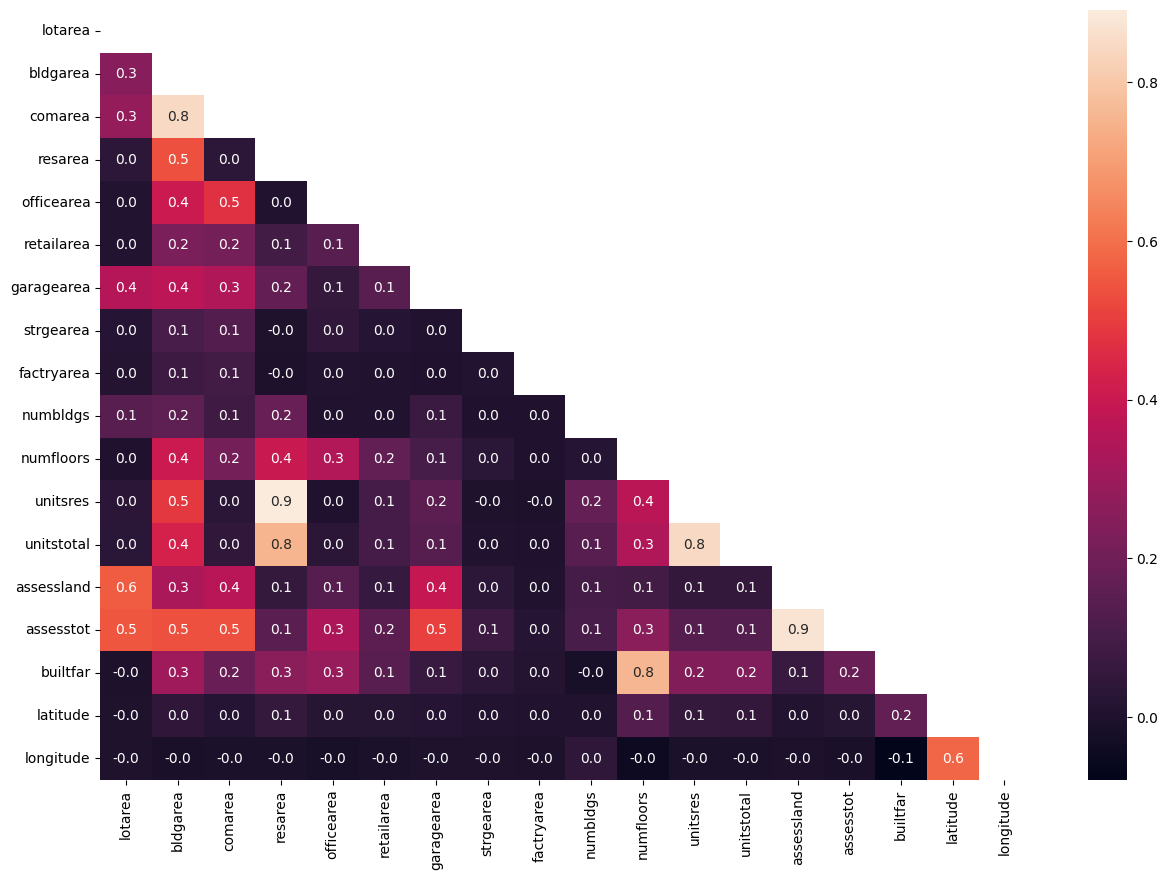

In [ ]:
# visualize pearson correlation
a = pluto_data_clean.select_dtypes(include=['int64','float64']).columns.to_list()
dataset = pluto_data_clean[a]

plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(numeric_only = True),
            annot = True,
            fmt = '.1f',
            mask = np.triu(np.ones_like(dataset.corr(), dtype=bool)))

### Summary

**Key Takeaways:**
- Data Structure: Some of the variables are technically categorical (like code-based variables) but are stored in numerical form. These variables are: 'block', 'lot', 'bct2020', 'bctcb2020', 'healthcenterdistrict', 'bldgclass', 'landuse', 'proxcode', 'lottype', 'bbl'.
- Missing Values: Five columns (zonedist2, zonedist3, zonedist4, overlay1, overlay2) have nearly 100% missing values, so we'll drop them. Key numerical variables (comarea, resarea, officearea, retailarea, garagearea, strgearea, factryarea) have the same null rate of 5.52%, likely from one row, to be addressed which may indicate the absence of applicable data (no building), suggesting replacement with 0 as needed.
- Data Distribution and Outlier Detection: almost all numerical variables are highly skewed and have so many outliers.
